In [2]:
import numpy as np
import pandas as pd
import json

n_noshape = 1500
sigma = 1

r = np.random.rayleigh(sigma, n_noshape)
tx_ts = np.random.choice(r, int(0.3*n_noshape))
tx_ts.sort()
rx_ts = np.setdiff1d(r, tx_ts)
rx_ts.sort()
trace = r
trace.sort()
tx_sizes = np.random.randint(75, 89, len(tx_ts))
rx_sizes = np.random.randint(1250, 1515, len(rx_ts))
tx_trace = [i for i in zip (tx_ts, tx_sizes)]
tx_trace.sort(key=lambda t: t[0])
rx_trace = [i for i in zip (rx_ts, -rx_sizes)]
rx_trace.sort(key=lambda t: t[0])
trace = tx_trace + rx_trace
trace.sort(key=lambda t: t[0])

N_TX = 900
N_RX = 1200
W_min = 0.5
W_max = 2
dummy_sz = 700
n_tx = np.random.randint(1, N_TX)
n_rx = np.random.randint(1, N_RX)
w_tx = np.random.rand()*(W_max-W_min) + W_min
w_rx = np.random.rand()*(W_max-W_min) + W_min

tx_dummy_ts = np.random.rayleigh(w_tx, n_tx)
rx_dummy_ts = np.random.rayleigh(w_rx, n_rx)


tx_dummy_trace = [(ts, dummy_sz) for ts in tx_dummy_ts]
tx_dummy_trace.sort(key=lambda t: t[0])
rx_dummy_trace = [(ts, -dummy_sz) for ts in rx_dummy_ts]
rx_dummy_trace.sort(key=lambda t: t[0])

defended = trace + tx_dummy_trace + rx_dummy_trace
defended.sort(key=lambda t: t[0])


In [2]:
print(type(trace), len(trace), trace[0])
print(type(defended), len(defended), defended[0])

<class 'list'> 1578 (0.043168612443204135, -1362)
<class 'list'> 3202 (0.037784137224301996, -700)


## Mockup data

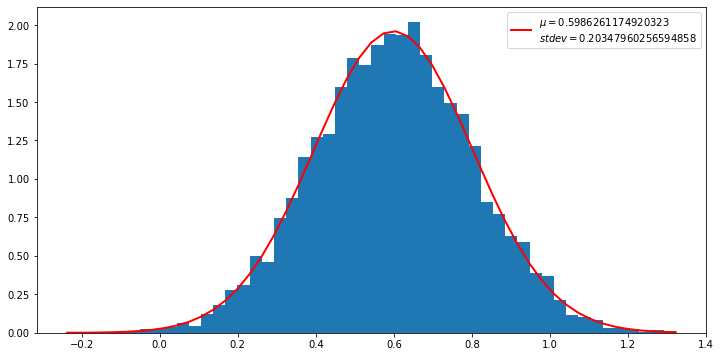

In [4]:
from matplotlib import pyplot as plt
#import scipy as scp
from scipy.stats import norm
pearsons = np.random.normal(loc=0.6, scale=0.2, size=(315,25))

flattened = pearsons.reshape(315*25)
flattened.shape

plt.figure(figsize=(12,6))
count, bins, _ = plt.hist(flattened, bins=50, density=True, stacked=True)

mu , std = norm.fit(flattened)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * std**2) ),
         linewidth=2, color='r', label=f'$\mu={mu}$\n$stdev={std}$')
plt.legend()
plt.show()

,rep0,rep1,rep2,rep3,rep4,rep5,rep6,rep7,rep8,rep9,...,rep15,rep16,rep17,rep18,rep19,rep20,rep21,rep22,rep23,rep24
0,0.643217,0.475094,0.511090,0.834987,0.895147,0.710752,0.457318,0.730626,0.661645,0.770839,...,0.633795,0.046484,0.582918,0.498513,0.672785,0.435917,0.545211,0.856539,0.758581,0.649632
1,0.877319,0.708528,0.524552,0.197724,0.614984,0.968712,0.576137,0.844097,0.303976,0.694136,...,0.513748,0.727941,0.608778,0.438646,0.572953,0.750869,0.584871,0.641862,0.463428,0.449250
2,0.765763,0.600430,0.741304,0.449695,0.573194,0.222485,0.490403,0.434825,0.658474,0.524390,...,0.553091,0.351569,0.785759,0.395366,0.685538,0.709365,0.822724,0.683879,0.512360,0.174173
3,0.405630,0.489954,0.316706,0.342235,0.191824,0.601924,0.571749,0.886260,0.286463,0.615653,...,0.790210,0.322214,0.728998,0.667898,0.462631,0.667753,0.723272,1.070656,0.708808,0.627974
4,0.621669,0.648185,0.918609,0.690155,0.078772,0.543150,0.363451,0.876291,0.514661,0.558133,...,0.852475,0.702360,0.901445,0.424340,0.614697,0.346138,0.666072,0.420717,0.658562,0.587535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.819472,0.188910,0.603808,0.810272,0.432705,0.290335,0.551985,0.528321,0.723415,0.181420,...,0.837404,0.349847,0.339847,0.642600,0.386041,0.704919,0.611127,0.894268,0.485632,0.263438
311,0.213467,0.965250,0.619990,0.791642,0.731144,0.599187,0.295125,0.772736,0.479736,0.794505,...,0.952845,0.625368,0.856961,0.605444,1.012924,0.752389,0.429513,0.655017,0.453410,0.461964
312,0.082121,0.391876,1.018211,0.757494,0.788342,0.633381,0.924057,0.519086,0.499427,0.947845,...,0.867954,0.244697,0.680320,0.787072,0.285122,0.156127,0.559634,0.521668,0.772655,0.477270
313,0.778927,0.705176,0.505220,0.173550,0.635842,0.364785,0.926016,0.778900,0.636226,0.536495,...,0.539806,0.435275,0.612431,0.291013,0.464041,0.636136,0.599183,0.691641,0.888813,0.590091


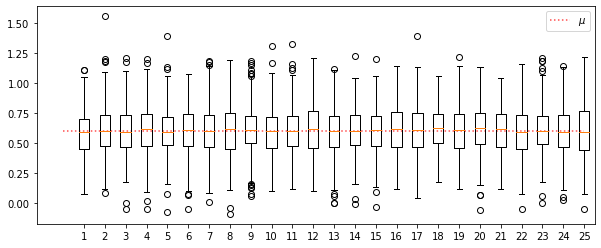

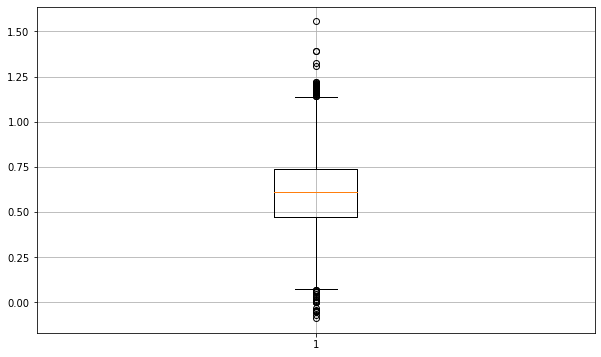

In [73]:
cols = [f"rep{n}" for n in range(25)]
samples = [f"Sample{n}" for n in range(315)]
df = pd.DataFrame(pearsons, columns=cols)
display(df)
#df['Sample'] = samples
#df = df.set_index('Sample').T
#display(df)
#df.boxplot(column=samples, rot=45, fontsize=10)

plt.figure(figsize=(10,4))
plt.hlines(y=mu, colors='r', linestyles='dotted', alpha=0.7, xmin=0, xmax=25, label=f'$\mu$')
plt.boxplot(pearsons)
plt.legend()
plt.figure(figsize=(10,6))
plt.grid()
plt.boxplot(flattened)
plt.show()


---

## Save JSON

In [16]:
import json
data =  {
    'TX': {
        'stats': (np.random.normal(loc=0.6, scale=(0.2)),0),
        'rolling': []
    },
    'RX': {
        'stats': (np.random.normal(loc=0.6, scale=(0.2)),0),
        'rolling': []
    }
}
#data['full'] = {
#    'TX': {
#        'stats': (np.random.normal(loc=0.6, scale=(0.2)),0),
#        'rolling': []
#    },
#    'RX': {
#        'stats': (np.random.normal(loc=0.6, scale=(0.2)),0),
#        'rolling': []
#    }
#}
print(data)

output = "../results/pearson/front/006_0/res.json"
with open(output, "w") as f:
    json.dump(data, f)

{'TX': {'stats': (0.3060828390698937, 0), 'rolling': []}, 'RX': {'stats': (0.7712430235546228, 0), 'rolling': []}}


In [5]:
with open(output, "r") as json_file:
    dataj = json.load(json_file)
print("Pearson: ", dataj['dummy']['RX']['stats'])

Pearson:  [0.46697447881208215, 0]
